<span style="font-size: 26px;"><b> «Вольный луг», оценка качества коров по надою и вкусу молока </b></span> 

Выбор коров для молочного хозяйства — одно из ключевых решений, от которого зависит успех бизнеса. Проведение тщательной оценки качества покупаемых коров по определенным критериям, является важнейшей ззадачей для дальнейшей эффективности бизнеса и поддеражния качества продукции.

<span style="font-size: 16px;"><b> Цель работы:</b></span> разработка моделей машинного обучения для прогноза удоя и качества молока коров.

<span style="font-size: 16px;"><b> План работы:</b></span> 
1. Загрузка 3 датасетов;
2. Изучение и оценка данных, преименование столбцов;
3. Предобработка данных. Устранение дубликатов, исправление типов данных изменение, заполнение пропусков и корректировка значений при необходимости;
4. Исслледовательский анализ данных. Посроение и анализ графиков признаков;
5. Корреляционный анализ признаков, выявление линейных связей и их отсутствия;
6. Разработка моделей линейной регрессии, определение лучшей, оценка предполагаемого удоя коров из списка для покупки;
7. Разработка модели логистической регресии, настройка модели на отстутсвие ошибок 1-го рода (False Positive), оценка предполагаемого вкуса молока коров из списка для покупки;
8. Выводы и рекомендации.

Для проведения исследования нам предоставлены 3 датасета:
1. <span style="font-size: 16px;"><b>ferma_main.csv </b></span> с данными о стаде фермера (id,	Удой,	ЭКЕ (Энергетическая кормовая единица),	Сырой протеин,	СПО (Сахаро-протеиновое соотношение),	Порода,	Тип пастбища,	порода папы_быка,	Жирность,	Белок,	Вкус молока,	Возраст); 
2. <span style="font-size: 16px;"><b>ferma_dad.csv </b></span> с именами отцов коров в стаде фермера (id,	Имя Папы);
3. <span style="font-size: 16px;"><b>cow_buy.csv </b></span> с данными о коровах «ЭкоФермы» (Порода,	Тип пастбища, 	порода папы_быка,	Имя_папы,	Текущая_жирность,	Текущий_уровень_белок,	Возраст). 

<span style="font-size: 16px;"><b> Импорт библиотек: </b></span> 

In [81]:
# Математические библиотеки
import numpy as np
import pandas as pd
from scipy import stats as st

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# Машинное обучение
from sklearn.model_selection import train_test_split

# Линейные модели
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Препроцессинг
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Метрики
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score
)

# Настройки отображения
pd.set_option('display.max_columns', None)

## Загрузка данных

In [82]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';',decimal=',')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';',decimal=',')

In [83]:
ferma_main.info()
ferma_main.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


In [84]:
ferma_dad.info()
ferma_dad.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [85]:
cow_buy.info()
cow_buy.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


<span style="font-size: 16px;"><b> Данные в датасетах соответствуют задачам, необходимо сократить названия и привести их к нижнему регистру. Дополнительно разделим признаки в датасете ferma_main.csv на группы.</b></span>

Характеристики коровы: id, Порода, порода папы_быка, Возраст.

Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).

Характеристика пастбища: Тип пастбища.

Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

In [86]:
new_order = ['id', 'Порода', 'порода папы_быка', 'Возраст', 'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Тип пастбища', 'Удой, кг',  'Жирность,%', 'Белок,%', 'Вкус молока']
ferma_main = ferma_main[new_order]
ferma_main.columns = pd.MultiIndex.from_tuples([('характеристики_коровы', 'id'),
                                                ('характеристики_коровы', 'порода'),
                                                ('характеристики_коровы', 'порода_папы'),
                                                ('характеристики_коровы', 'возраст'),
                                                ('характеристики_корма', 'эке'),
                                                ('характеристики_корма', 'протеин'),
                                                ('характеристики_корма', 'спо'),
                                                ('характеристика_пастбища', 'пастбище'),
                                                ('характеристики_молока', 'удой'),
                                                ('характеристики_молока', 'жирность'),
                                                ('характеристики_молока', 'белок'),
                                                ('характеристики_молока', 'вкус')                                       
    ])

ferma_dad.columns = ['id', 'имя_папы']
cow_buy.columns = ['порода', 'пастбище', 'порода_папы', 'имя_папы', 'жирность', 'белок', 'возраст']

display(ferma_main.head())
display(ferma_dad.head())
display(cow_buy.head())

характеристики_коровы                                            \
                     id           порода порода_папы      возраст   
0                     1   Вис Бик Айдиал      Айдиал  более_2_лет   
1                     2   Вис Бик Айдиал     Соверин  менее_2_лет   
2                     3  РефлешнСоверинг     Соверин  более_2_лет   
3                     4  РефлешнСоверинг      Айдиал  более_2_лет   
4                     5   Вис Бик Айдиал     Соверин  менее_2_лет   

  характеристики_корма                характеристика_пастбища  \
                   эке протеин    спо                пастбище   
0                 14.2    1743  0.890               Равнинное   
1                 12.8    2138  0.890               Равнинные   
2                 14.0    1854  0.885               Холмистое   
3                 12.4    2012  0.885               Холмистое   
4                 12.8    1675  0.885               Равнинные   

  характеристики_молока                             
                   удой жирность  белок       вкус  
0                  5863     3.58  3.076     вкусно  
1                  5529     3.54  3.079     вкусно  
2                  5810     3.59  3.074  не вкусно  
3                  5895     3.40  3.075  не вкусно  
4                  5302     3.73  3.073     вкусно

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,порода,пастбище,порода_папы,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Всего загружено 3 датасета, содеражих 634 строки данных о имеющихся на ферме коровах, 629 строк данных об оцах коров и 20 строк данных о продающихся коровах. Названия столбцов приведены к нижнему регистру и сокращены для удобства, также данные по ферме сгруппированы по категориям с помощью мультииндекса.

##  Предобработка данных

Проверим данные колонок датафреймов на наличие неявных дубликатов.

In [87]:
print('\033[1mferma_main уникальные данные в колонках:\033[0m ' +'\n')
print('порода -', ferma_main['характеристики_коровы', 'порода'].unique().tolist())
print('порода_папы -', ferma_main['характеристики_коровы', 'порода_папы'].unique().tolist())
print('возраст -', ferma_main['характеристики_коровы', 'возраст'].unique().tolist())
print('эке -', ferma_main['характеристики_корма', 'эке'].unique().tolist())
print('протеин -', ferma_main['характеристики_корма', 'протеин'].unique().tolist())
print('спо -', ferma_main['характеристики_корма', 'спо'].unique().tolist())
print('пастбище -', ferma_main['характеристика_пастбища', 'пастбище'].unique().tolist())
print('удой -', ferma_main['характеристики_молока', 'удой'].unique().tolist())
print('жирность -', ferma_main['характеристики_молока', 'жирность'].unique().tolist())
print('белок -', ferma_main['характеристики_молока', 'белок'].unique().tolist())
print('вкус -', ferma_main['характеристики_молока', 'вкус'].unique().tolist())

print('\n' + '\033[1mcow_buy уникальные данные в колонках:\033[0m'+'\n' )
print('порода -', cow_buy['порода'].unique().tolist())
print('пастбище -', cow_buy['пастбище'].unique().tolist())
print('порода_папы -', cow_buy['порода_папы'].unique().tolist())
print('имя_папы -', cow_buy['имя_папы'].unique().tolist())
print('жирность -', cow_buy['жирность'].unique().tolist())
print('белок -', cow_buy['белок'].unique().tolist())
print('возраст -', cow_buy['возраст'].unique().tolist())

print('\n' + '\033[1mferma_dad уникальные данные в колонках:\033[0m'+'\n' )
print('имя_папы -', ferma_dad['имя_папы'].unique().tolist())

ferma_main уникальные данные в колонках: 

порода - ['Вис Бик Айдиал', 'РефлешнСоверинг']
порода_папы - ['Айдиал', 'Соверин', 'Айдиалл']
возраст - ['более_2_лет', 'менее_2_лет']
эке - [14.2, 12.8, 14.0, 12.4, 12.7, 13.2, 14.7, 13.4, 13.7, 16.5, 15.4, 14.5, 16.0, 15.6, 11.5, 15.7, 14.3, 15.5, 14.6, 15.9, 15.2, 14.8, 16.4, 11.8, 14.4, 16.1, 12.9, 13.8, 13.3, 16.3, 13.9, 14.1, 16.7, 15.8, 16.2, 12.2, 14.9, 13.6, 12.5, 16.8, 13.5, 15.1, 12.1, 16.6, 15.3, 13.1, 12.3, 11.9, 12.6, 15.0, 13.0, 12.0, 11.1, 11.7, 10.9]
протеин - [1743, 2138, 1854, 2012, 1675, 1806, 1792, 1918, 1791, 1678, 2328, 2193, 1766, 1769, 1747, 1873, 2159, 1759, 1924, 1947, 2134, 1822, 1703, 1821, 1901, 2303, 2173, 1840, 1764, 1994, 1788, 2141, 1734, 1768, 1702, 2269, 1745, 1726, 1824, 1797, 1717, 1830, 2041, 2146, 1932, 1974, 1930, 1867, 1905, 1784, 1955, 1816, 2097, 2264, 2121, 1664, 1991, 2122, 2058, 1999, 2327, 2100, 1894, 2157, 2093, 2212, 1804, 2189, 1795, 2106, 1888, 1849, 2285, 1838, 1790, 2018, 1750, 1883, 1909, 

В датафрейме ferma_main есть дубликаты. В колонке "порода_папы" Айдиалл надо заменить на Айдиал, а в колонке "пастбище" заменить Равнинные на Равнинное.

In [88]:
ferma_main['характеристики_коровы', 'порода_папы'] = (
    ferma_main['характеристики_коровы', 'порода_папы'].str 
    .replace('Айдиалл', 'Айдиал') 
)

ferma_main['характеристика_пастбища', 'пастбище'] = (
    ferma_main['характеристика_пастбища', 'пастбище'].str 
    .replace('Равнинные', 'Равнинное') 
)

print('порода_папы -', ferma_main['характеристики_коровы', 'порода_папы'].unique().tolist())
print('пастбище -', ferma_main['характеристика_пастбища', 'пастбище'].unique().tolist())

порода_папы - ['Айдиал', 'Соверин']
пастбище - ['Равнинное', 'Холмистое']


<span style="font-size: 14px;"><b> Проверим на наличие дубликатов </b></span> 

In [89]:
print('дубликаты ferma_main -', ferma_main.duplicated().sum())
print('дубликаты ferma_dad -',ferma_dad.duplicated().sum())

дубликаты ferma_main - 5
дубликаты ferma_dad - 0


Удалим дубликаты в датафреймах ferma_main и cow_buy

In [90]:
ferma_main = ferma_main.drop_duplicates()

In [91]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   (характеристики_коровы, id)           629 non-null    int64  
 1   (характеристики_коровы, порода)       629 non-null    object 
 2   (характеристики_коровы, порода_папы)  629 non-null    object 
 3   (характеристики_коровы, возраст)      629 non-null    object 
 4   (характеристики_корма, эке)           629 non-null    float64
 5   (характеристики_корма, протеин)       629 non-null    int64  
 6   (характеристики_корма, спо)           629 non-null    float64
 7   (характеристика_пастбища, пастбище)   629 non-null    object 
 8   (характеристики_молока, удой)         629 non-null    int64  
 9   (характеристики_молока, жирность)     629 non-null    float64
 10  (характеристики_молока, белок)        629 non-null    float64
 11  (характеристики_мол

Данные подготовлены для исследовательского анализа данных выявлены и убраны неявные дубликаты. Удалены полные дубликаты в датафрейме ferma_main. Тип данных признаков корректны.

## Исследовательский анализ данных

Построим графики распределения свойств для категориальных и количественных признаков.

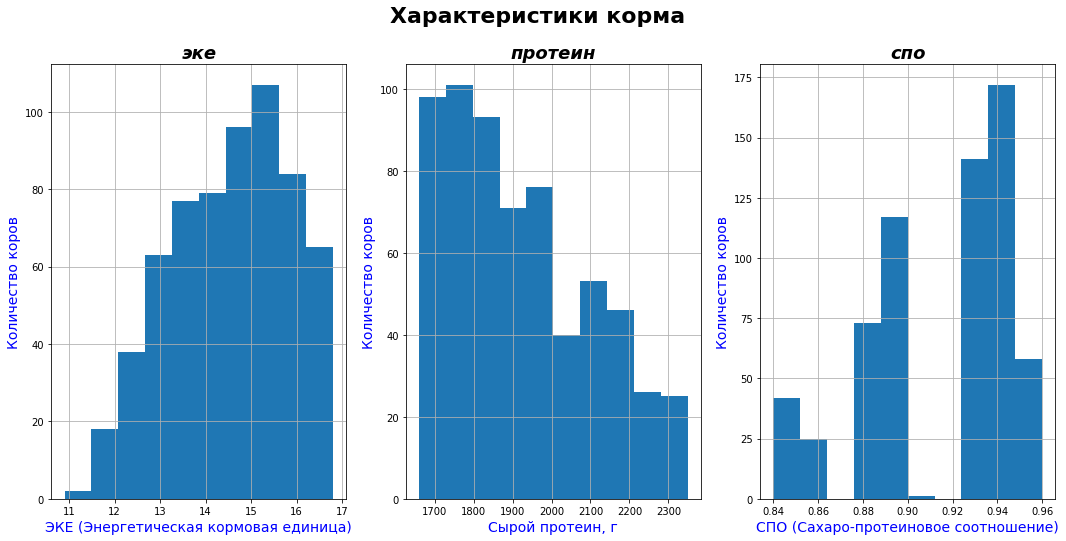

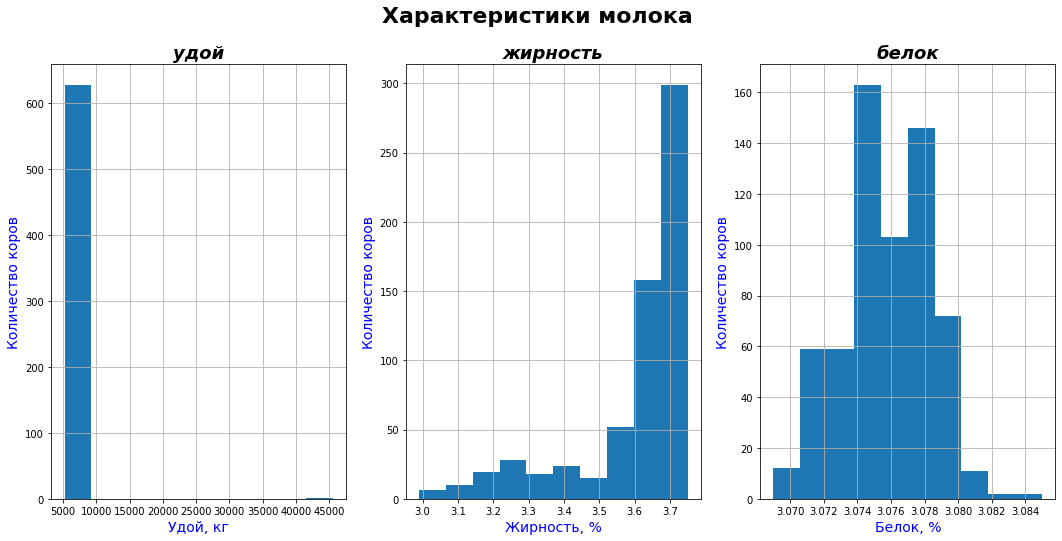

In [92]:
cat_feed_list = (
    [('характеристики_корма', 'эке'),
    ('характеристики_корма', 'протеин'),
    ('характеристики_корма', 'спо')]
)
cat_milk_list = (
    [('характеристики_молока', 'удой'),
    ('характеристики_молока', 'жирность'), 
    ('характеристики_молока', 'белок')]
)

ct_feed = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)']
ct_milk = ['Удой, кг', 'Жирность, %', 'Белок, %']

fig, axs = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle('Характеристики корма', fontsize=22, weight='bold')
k = 0
for cat in cat_feed_list:
    ferma_main[cat].hist(ax=axs[k])
    axs[k].set_xlabel(ct_feed[k], fontsize=14, color='blue')
    axs[k].set_ylabel('Количество коров', fontsize=14, color='blue')
    axs[k].set_title(cat[1] , fontsize=18, weight='bold',style='italic')
    k += 1


fig, axs = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle('Характеристики молока', fontsize=22, weight='bold')
k = 0
for cat in cat_milk_list:
    ferma_main[cat].hist(ax=axs[k])
    axs[k].set_xlabel(ct_milk[k], fontsize=14, color='blue')
    axs[k].set_ylabel('Количество коров', fontsize=14, color='blue')
    axs[k].set_title(cat[1] , fontsize=18, weight='bold',style='italic')
    k += 1



      

В данных удоя есть аномальные значения больше 9000 кг, определим количество таких данных .

In [93]:
ferma_main[ferma_main['характеристики_молока', 'удой'] >= 9000].shape[0]

1

Аномальных данных мало и их удаление улучшит качество датафрейма. Удалим аномальную строчку и пересроим гистограммы.

In [94]:
ferma_main = ferma_main[ferma_main['характеристики_молока', 'удой'] < 9000]
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   (характеристики_коровы, id)           628 non-null    int64  
 1   (характеристики_коровы, порода)       628 non-null    object 
 2   (характеристики_коровы, порода_папы)  628 non-null    object 
 3   (характеристики_коровы, возраст)      628 non-null    object 
 4   (характеристики_корма, эке)           628 non-null    float64
 5   (характеристики_корма, протеин)       628 non-null    int64  
 6   (характеристики_корма, спо)           628 non-null    float64
 7   (характеристика_пастбища, пастбище)   628 non-null    object 
 8   (характеристики_молока, удой)         628 non-null    int64  
 9   (характеристики_молока, жирность)     628 non-null    float64
 10  (характеристики_молока, белок)        628 non-null    float64
 11  (характеристики_мол

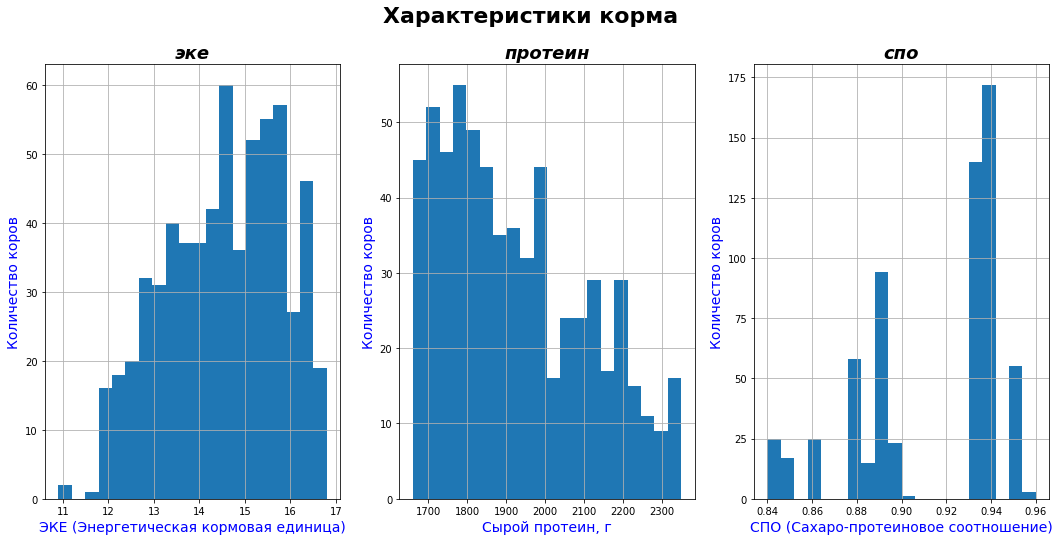

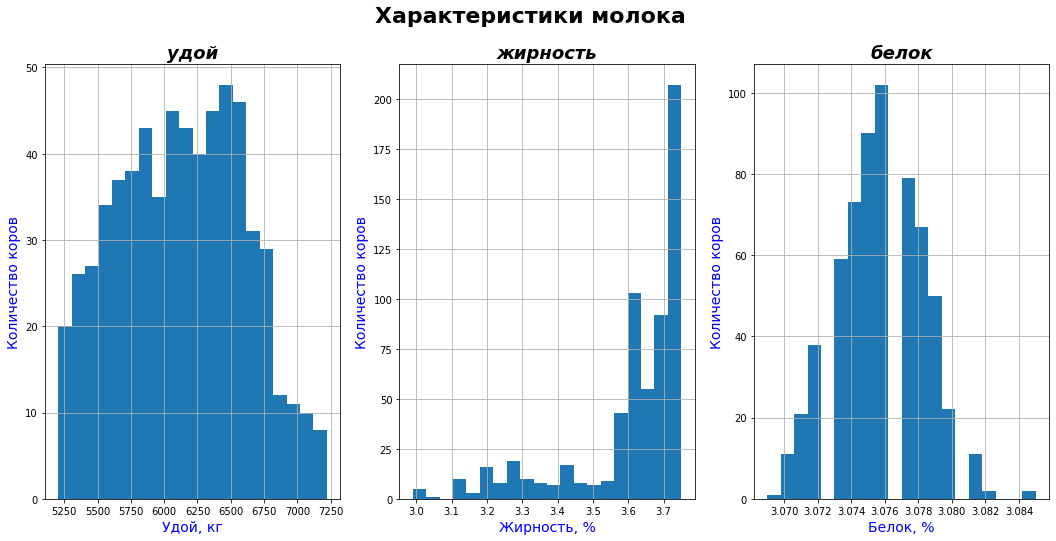

In [95]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle('Характеристики корма', fontsize=22, weight='bold')
k = 0
for cat in cat_feed_list:
    ferma_main[cat].hist(bins=20, ax=axs[k])
    axs[k].set_xlabel(ct_feed[k], fontsize=14, color='blue')
    axs[k].set_ylabel('Количество коров', fontsize=14, color='blue')
    axs[k].set_title(cat[1] , fontsize=18, weight='bold',style='italic')
    k += 1


fig, axs = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle('Характеристики молока', fontsize=22, weight='bold')
k = 0
for cat in cat_milk_list:
    ferma_main[cat].hist(bins=20, ax=axs[k])
    axs[k].set_xlabel(ct_milk[k], fontsize=14, color='blue')
    axs[k].set_ylabel('Количество коров', fontsize=14, color='blue')
    axs[k].set_title(cat[1] , fontsize=18, weight='bold',style='italic')
    k += 1


''

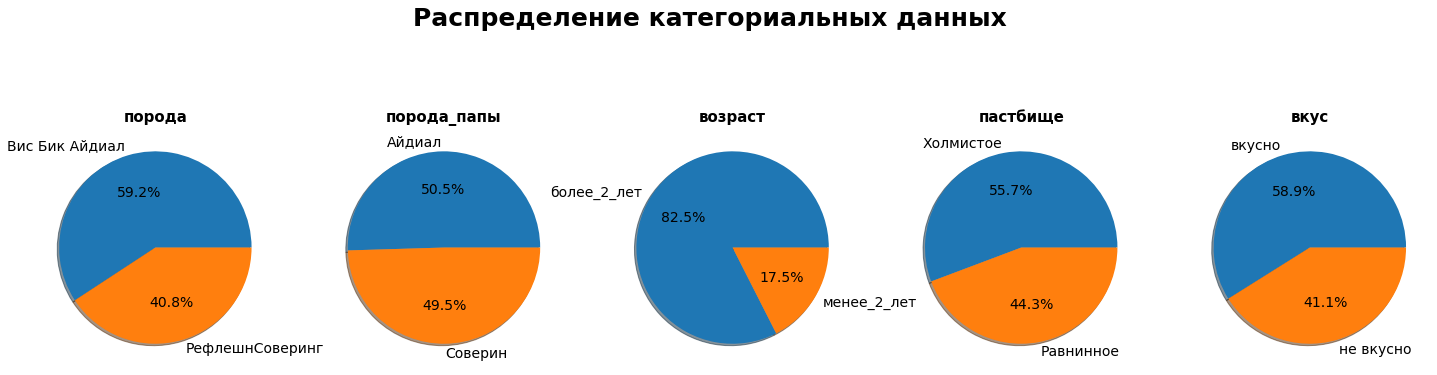

In [96]:
categories_list = (
    [('характеристики_коровы','порода'), 
    ('характеристики_коровы', 'порода_папы'), 
    ('характеристики_коровы', 'возраст'), 
    ('характеристика_пастбища', 'пастбище'),
    ('характеристики_молока', 'вкус')]
)
ct = ['порода', 'порода_папы', 'возраст', 'пастбище', 'вкус']

fig, axs = plt.subplots(1, 5, figsize=(25,7))
fig.suptitle('Распределение категориальных данных', fontsize=25, weight='bold')
k = 0

for cat in categories_list:
    ferma_main[cat].value_counts().plot.pie(
        autopct='%1.1f%%',
        shadow=True,
        fontsize=14,                              
        legend=False,
        ylabel='',
        ax=axs[k]
    )
    plt.title('Сотношение пользователей по типу подписки', fontsize=16)
    axs[k].set_title(ct[k], fontsize=15, weight='bold')
    k += 1
''

Из данных видно, что немного преобладает порода коров Вис Бик Айдиал, порода папы разделена поровну, подавляющая часть коров старше 2 лет, по типу пастбища незначительно преобладает холмистое , молоко вкусное у 59 % коров. Преобладает корм с протеином менее 2000 г. и распределение протеина похоже на Пуассона, а молоко с жирностью больше 3.6 % и рапределение жирности экспоненциальное. Остальные количесвенные параметры рспределены нормально.

## Корреляционный анализ

Построим матрицу корелляций между всеми признаками.

''

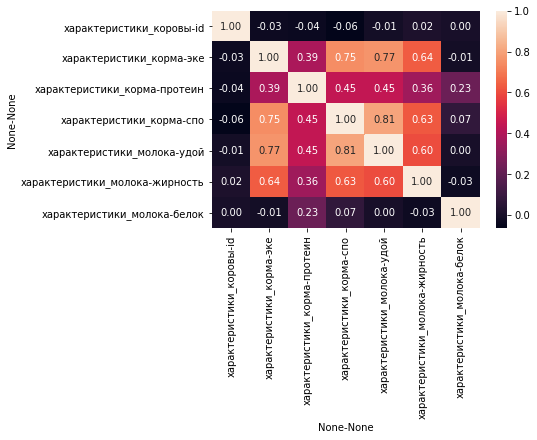

In [97]:
sns.heatmap(ferma_main.corr(), annot=True, fmt='.2f') 
""

Видна высокая корреляция между "спо", "эке" и "удоем" . Также заметная корреляция между "жирностью молока" и "удоем". Также между собой заметно коррелируют признаки "спо", "эке" и "жирность", но коэффициент корреляции меньше 0.9, мультиколлениарность отсутствует.

Построим диаграммы рассеяния удоя от каждого количесвенного признака, с учетом категориальных признаков. На каждой линии графиков будет зависимость удоя от одного количественного признака и 4 категориальных.

''

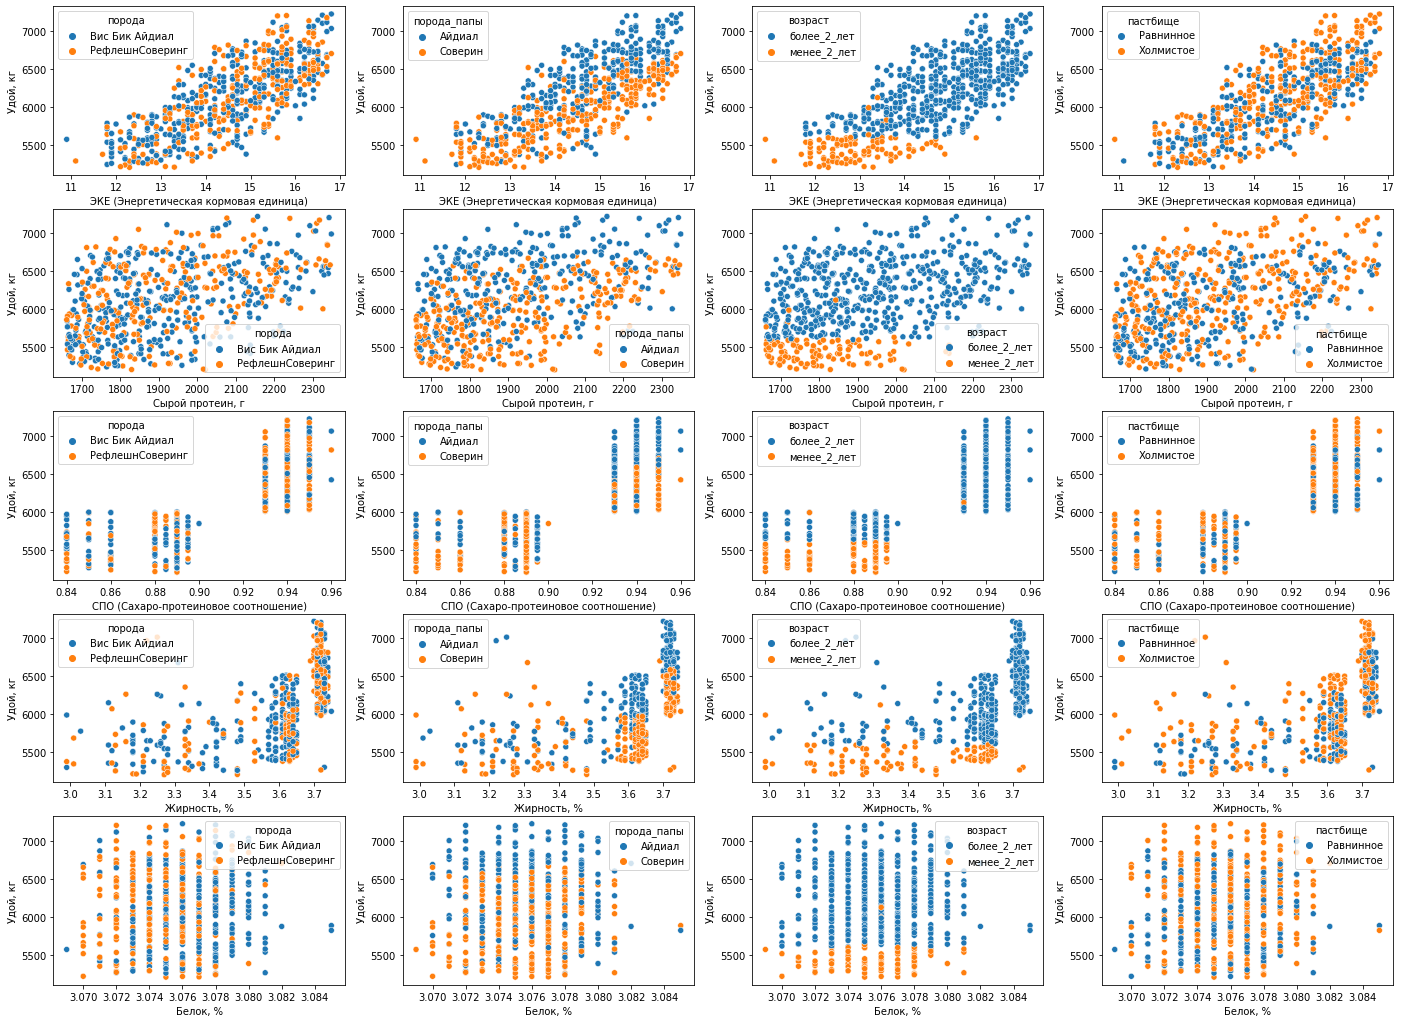

In [98]:
def scat(har, tit):
    cat_quantitative_list = (
        [('характеристики_корма', 'эке'),
        ('характеристики_корма', 'протеин'),
        ('характеристики_корма', 'спо'),
        ('характеристики_молока', 'жирность'), 
        ('характеристики_молока', 'белок')]
    )
    ct_quant = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Жирность, %', 'Белок, %']   
    
    categories_list = (
        [('характеристики_коровы','порода'), 
        ('характеристики_коровы', 'порода_папы'), 
        ('характеристики_коровы', 'возраст'), 
        ('характеристика_пастбища', 'пастбище')]
    )
        
    ct = ['порода', 'порода_папы', 'возраст', 'пастбище']

    fig, axs = plt.subplots(5, 4, figsize=(24, 18))

    k = 0
    m = 0
    for cat_q in cat_quantitative_list:
        for cat_c in categories_list:
            sns.scatterplot(
                x=cat_q, 
                y=har, 
                hue=cat_c, 
                data=ferma_main,
                ax=axs[k, m]
            ) 

            axs[k, m].set_xlabel(ct_quant[k])
            axs[k, m].set_ylabel(tit)
            axs[k, m].legend(title=ct[m])
            m +=1
        k += 1
        m = 0
        

    
scat(('характеристики_молока', 'удой'), 'Удой, кг')

    
''

Из полученных графиков видно, что удой нелинейно связан с ЭКЕ, СПО и белком. Заметно, что удой вышеу коров старше 2 лет и у породы_папы Айдал. Признак спо разделен два кластера по определенной границе, необходимо перевести его в категориальный бинарный тип. Также необходимо ввести новую переменную дли исключения нелинейности зависимости удоя от ЭКЕ.

## Обучение модели линейной регрессии

<span style="font-size: 14px;"><b> Модель 1</b></span> 

Подготовим датасет для машинного обучения, целевым признаком будет удой, входными - порода, пород_папы, возраст, эке, протеин, спо и пастбище. Жирность и белок не берем, так как это характеристики молока зависящие от корма и других характеристик коровы, связь между удоем и белком отсутствует, а жирность связана с спо и эке.

In [99]:
data_learn_1 = ferma_main
data_learn_1.columns = data_learn_1.columns.droplevel(0)
data_learn_1 = data_learn_1.drop(['id', 'жирность', 'белок', 'вкус'], axis=1) 
data_learn_1.head()

,порода,порода_папы,возраст,эке,протеин,спо,пастбище,удой
0,Вис Бик Айдиал,Айдиал,более_2_лет,14.2,1743,0.890,Равнинное,5863
1,Вис Бик Айдиал,Соверин,менее_2_лет,12.8,2138,0.890,Равнинное,5529
2,РефлешнСоверинг,Соверин,более_2_лет,14.0,1854,0.885,Холмистое,5810
3,РефлешнСоверинг,Айдиал,более_2_лет,12.4,2012,0.885,Холмистое,5895
4,Вис Бик Айдиал,Соверин,менее_2_лет,12.8,1675,0.885,Равнинное,5302


Напишем функцию для обучения моделей. Она выделит из датафрейма целевой и входные признаки, разделит на тренировочную и тестовую выборки, закодирует категориальные и отмасштабирует количеественные признаки, обучет модель линейной регресии и вернет модель и преобразованную тестовую выборку. 

In [100]:
def mod_lr(data, cat_col_names, num_col_names ):
    RANDOM_STATE = 42

    X = data.drop('удой', axis=1) 
    y = data['удой']


    X_train, X_test, y_train, y_test =  train_test_split(
        X,
        y,
        random_state=RANDOM_STATE
    )

    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    encoder_col_names = encoder.get_feature_names() 

    scaler = StandardScaler()
    X_train_scaled  = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled= scaler.transform(X_test[num_col_names])

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)
    return model_lr, X_test, y_test

def residue(predictions, y_test):

    residuals = y_test - predictions
    mean_value = residuals.mean()
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')
    axes[0].axvline(mean_value, color='red', linestyle='dashed', linewidth=2)
    axes[0].axvline(0, color='blue', linestyle='dashed', linewidth=2)
    
    axes[1].scatter(x=predictions, y=residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    
    plt.show()

Обучим 1 модель.

R² модели: 0.78


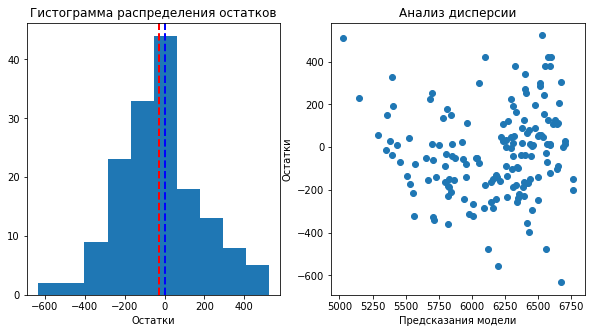

In [101]:
cat_col_names_1 = ['порода', 'порода_папы', 'возраст', 'пастбище']
num_col_names_1 = ['эке', 'протеин', 'спо']
model_lr_1, X_test_1, y_test_1 = mod_lr(data_learn_1, cat_col_names_1, num_col_names_1)
predictions_1 = model_lr_1.predict(X_test_1)

r2_1 = r2_score(
            y_test_1,
            predictions_1
)
print('R² модели:', round(r2_1,2))

residue(predictions_1, y_test_1)

По результатам обучения модели , расчета коэффициента детерминации и анализа остатков видно, что модель работает, но не достаточно хорошо. Коэффициент детерминации менее 0.8 указывает на то, что модель недостаточно хорошо описывает данные. Из гистограммы распределения остатков видно, что распределение нормальное, но не совсем симметричное и среднее значение смещено в лево, модель часто дает предсказание больше реального значения. Дисперсия не постоянная, при больших значениях целевого признака возникает увеличивается разброс. Нужны дополнительные исследования и дороботка модели.

<span style="font-size: 14px;"><b> Модель 2 </b></span> 

Изучив диаграммы рассеяния, видно что СПО и удой связаны нелинейно, а разделены на 2 кластера. Прревратим удой в категориальный бинарный признак по границе 0.92 , все что меньше будет 0, больше 1.

In [102]:
data_learn_2 = data_learn_1
data_learn_2['спо'] = (data_learn_2['спо'] > 0.92).astype(int)

Изучив диаграммы рассеяния, видно что ЭКЕ и удой связаны нелинейно, это можно исправить возведя ЭКЕ в квадрат.

In [103]:
data_learn_2['эке'] = data_learn_2['эке'] ** 2
data_learn_2.head()

,порода,порода_папы,возраст,эке,протеин,спо,пастбище,удой
0,Вис Бик Айдиал,Айдиал,более_2_лет,201.64,1743,0,Равнинное,5863
1,Вис Бик Айдиал,Соверин,менее_2_лет,163.84,2138,0,Равнинное,5529
2,РефлешнСоверинг,Соверин,более_2_лет,196.00,1854,0,Холмистое,5810
3,РефлешнСоверинг,Айдиал,более_2_лет,153.76,2012,0,Холмистое,5895
4,Вис Бик Айдиал,Соверин,менее_2_лет,163.84,1675,0,Равнинное,5302


Обучим 2 модель.

R² модели: 0.82


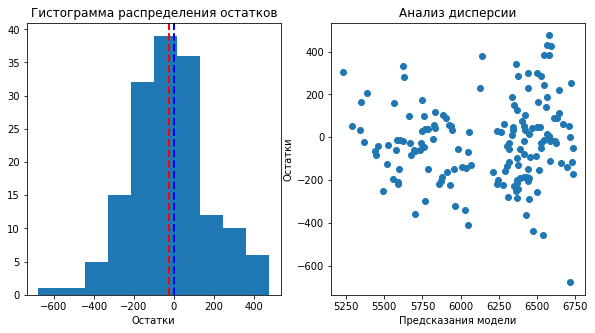

In [104]:
cat_col_names_2 = ['порода', 'порода_папы', 'возраст', 'пастбище', 'спо']
num_col_names_2 = ['эке', 'протеин']
model_lr_2, X_test_2, y_test_2 = mod_lr(data_learn_2, cat_col_names_2, num_col_names_2)
predictions_2 = model_lr_2.predict(X_test_2)

r2_2 = r2_score(
            y_test_2,
            predictions_2
)
print('R² модели:', round(r2_2,2))

residue(predictions_2, y_test_2)

По результатам обучения 2 модели , расчета коэффициента детерминации и анализа остатков видно, что модель работает лучше, чем 1. Коэффициент детерминации более 0.8 указывает на то, что модель достаточно хорошо описывает данные. Из гистограммы распределения остатков видно, что распределение нормальное, симметричнее чем в 1 модели и среднее значение смещено в лево, модель часто дает предсказание больше реального значения. Дисперсия стала более постоянной но встречаются редкие выбросы. можно попробовать улучшить модель , добавив входно признак имя_папы.

<span style="font-size: 14px;"><b> Модель 3 </b></span> 

Подготовим данные для 3 модели, добавим столбец имя_папы и выполним действия аналогичные прошлым модлеям.

In [105]:
data_learn_3 = ferma_main
data_learn_3 = pd.merge(data_learn_3, ferma_dad, on='id', how='inner')
mean = data_learn_3['имя_папы']
data_learn_3= data_learn_3.drop('имя_папы', axis=1)
data_learn_3.insert(3, 'имя_папы', mean)
data_learn_3 = data_learn_3.drop(['id', 'жирность', 'белок', 'вкус'], axis=1) 
data_learn_3['спо'] = (data_learn_3['спо'] > 0.92).astype(int)
data_learn_3['эке'] = data_learn_3['эке'] ** 2
data_learn_3.info()
data_learn_3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   порода       628 non-null    object 
 1   порода_папы  628 non-null    object 
 2   имя_папы     628 non-null    object 
 3   возраст      628 non-null    object 
 4   эке          628 non-null    float64
 5   протеин      628 non-null    int64  
 6   спо          628 non-null    int64  
 7   пастбище     628 non-null    object 
 8   удой         628 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 49.1+ KB


,порода,порода_папы,имя_папы,возраст,эке,протеин,спо,пастбище,удой
0,Вис Бик Айдиал,Айдиал,Буйный,более_2_лет,201.64,1743,0,Равнинное,5863
1,Вис Бик Айдиал,Соверин,Соловчик,менее_2_лет,163.84,2138,0,Равнинное,5529
2,РефлешнСоверинг,Соверин,Барин,более_2_лет,196.00,1854,0,Холмистое,5810
3,РефлешнСоверинг,Айдиал,Буйный,более_2_лет,153.76,2012,0,Холмистое,5895
4,Вис Бик Айдиал,Соверин,Барин,менее_2_лет,163.84,1675,0,Равнинное,5302


Обучим 3 модель.

R² модели: 0.82


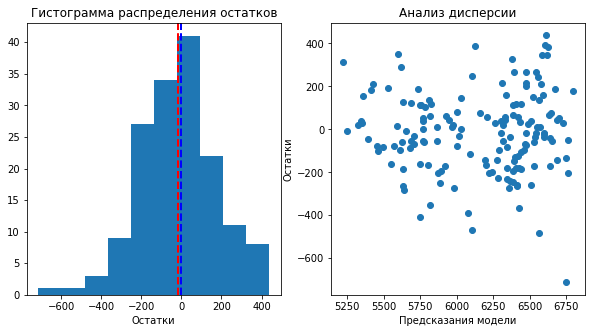

In [106]:
cat_col_names_3 = ['порода', 'порода_папы', 'имя_папы', 'возраст', 'пастбище', 'спо']
num_col_names_3 = ['эке', 'протеин']
model_lr_3, X_test_3, y_test_3 = mod_lr(data_learn_3, cat_col_names_3, num_col_names_3)
predictions_3 = model_lr_3.predict(X_test_3)

r2_3 = r2_score(
            y_test_3,
            predictions_3
)
print('R² модели:', round(r2_3,2))

residue(predictions_3, y_test_3)

По результатам обучения 2 модели , расчета коэффициента детерминации и анализа остатков видно, что модель работает также как 2. Коэффициент детерминации более 0.8 указывает на то, что модель достаточно хорошо описывает данные. Из гистограммы распределения остатков видно, что распределение нормальное, среднее значение смещено в лево меньше чем в 1 и 2 моделях. Дисперсия такая же как и у 2 модели.

У первой модели R²=0.78, у второй и третьей R²=0.82. У второйи третьей гистограммы остатков более симтричны, а дисперсия более постоянная чем у 1 модели. У 3 модели меньше всего смещение среднего относительно 0.

In [107]:
def metr(predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return print(' MSE =', mse, '\n', 'MAE =', mae, '\n', 'RMSE =', rmse)


print('Модель 1:')
metr(predictions_1, y_test_1)
print('Модель 2:')
metr(predictions_2, y_test_2)
print('Модель 3:')
metr(predictions_3, y_test_3)

Модель 1:
 MSE = 43887.0150096605 
 MAE = 164.2419446347492 
 RMSE = 209.49227911706078
Модель 2:
 MSE = 37030.91131113697 
 MAE = 149.03965222364607 
 RMSE = 192.43417396901458
Модель 3:
 MSE = 35673.88988618193 
 MAE = 146.1630244536231 
 RMSE = 188.87532895055915


Как видно из метрик, в модели 3 наименьшие показатели ошибок, она является лучшей. определим ее 95% доверительный интервал.

In [108]:
error = y_test_3 - predictions_3
lower_quantile = error.quantile(0.025)
upper_quantile = error.quantile(0.975)
print(f"Доверительный интервал ошибок: [{lower_quantile}, {upper_quantile}]")

Доверительный интервал ошибок: [-393.0996370790128, 355.93715119412064]


<span style="font-size: 14px;"><b> Прогноз удоя коров из списка для покупки </b></span> 

Обработаем значения из датафрейм cow_buy добавим средние значения СПО, ЭКЕ и Сырого протеина увеличенные на 5%. также приведем столбцы к формату тестовых данных из 3 модели.

In [109]:
X_buy = cow_buy.drop([ 'жирность', 'белок'], axis=1) 
X_buy['эке'] = ferma_main['эке'].median() * 1.05
X_buy['спо'] = ferma_main['спо'].median() * 1.05
X_buy['протеин'] = ferma_main['протеин'].median() * 1.05
new_order_cow_buy = data_learn_3.columns.tolist()
new_order_cow_buy.remove('удой')
X_buy = X_buy[new_order_cow_buy]
X_buy['спо'] = (X_buy['спо'] > 0.92).astype(int)
X_buy['эке'] = X_buy['эке'] ** 2
X_buy.info()
X_buy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   порода       20 non-null     object 
 1   порода_папы  20 non-null     object 
 2   имя_папы     20 non-null     object 
 3   возраст      20 non-null     object 
 4   эке          20 non-null     float64
 5   протеин      20 non-null     float64
 6   спо          20 non-null     int64  
 7   пастбище     20 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.4+ KB


,порода,порода_папы,имя_папы,возраст,эке,протеин,спо,пастбище
0,Вис Бик Айдиал,Айдиал,Геркулес,более_2_лет,238.239225,1982.4,1,холмистое
1,Вис Бик Айдиал,Соверин,Буйный,менее_2_лет,238.239225,1982.4,1,равнинное
2,РефлешнСоверинг,Соверин,Барин,более_2_лет,238.239225,1982.4,1,равнинное
3,РефлешнСоверинг,Айдиал,Буйный,более_2_лет,238.239225,1982.4,1,холмистое
4,РефлешнСоверинг,Айдиал,Буйный,более_2_лет,238.239225,1982.4,1,равнинное


Отмасштабируем и закодируем данные. Спрогнозируем удой коров для покупке по 3 модели.

In [110]:
cat_col_names_buy = ['порода', 'порода_папы', 'имя_папы', 'возраст', 'пастбище', 'спо']
num_col_names_buy = ['эке', 'протеин']

encoder = OneHotEncoder(drop='first', sparse=False)
X_buy_ohe = encoder.fit_transform(X_buy[cat_col_names_buy])
encoder_col_names_buy = encoder.get_feature_names() 

scaler = StandardScaler()
X_buy_scaled= scaler.fit_transform(X_buy[num_col_names_buy])

X_buy_ohe = pd.DataFrame(X_buy_ohe, columns=encoder_col_names_buy)
X_buy_scaled = pd.DataFrame(X_buy_scaled, columns=num_col_names_buy)

X_buy = pd.concat([X_buy_ohe, X_buy_scaled], axis=1)
X_buy .insert(7, 'x5_1', 1.0)

display(X_test_3.head())
display(X_buy.head())


,x0_РефлешнСоверинг,x1_Соверин,x2_Буйный,x2_Геркулес,x2_Соловчик,x3_менее_2_лет,x4_Холмистое,x5_1,эке,протеин
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.527089,-0.813322
1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.490346,0.026730
2,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.527089,-0.682405
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.961737,-1.058792
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.561660,-1.413360


,x0_РефлешнСоверинг,x1_Соверин,x2_Буйный,x2_Геркулес,x2_Соловчик,x3_менее_2_лет,x4_холмистое,x5_1,эке,протеин
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-1.0,-1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,-1.0,-1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-1.0,-1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0


Рассчитаем удой на основе модели 3 и добавим столбец в датафрейм cow_buy.

In [111]:
predictions_buy = model_lr_3.predict(X_buy)
cow_buy.insert(len(cow_buy.columns), 'удой', predictions_buy.round(0).astype(int))
cow_buy.head(20)

,порода,пастбище,порода_папы,имя_папы,жирность,белок,возраст,удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6281
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6049
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,5955
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6264
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6213
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6096
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6281
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6242
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,5955
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6071


## Обучение модели логистической регрессии

Создадим и обучим модель логистической регресии на данных ferma_main, для предсказания вкуса молока у продающихся коров. Исключим из датафрейма 

In [112]:
data_learn_4 = ferma_main
data_learn_4 = pd.merge(data_learn_4, ferma_dad, on='id', how='inner')
mean = data_learn_4['имя_папы']
data_learn_4= data_learn_4.drop('имя_папы', axis=1)
data_learn_4.insert(3, 'имя_папы', mean)
data_learn_4['спо'] = (data_learn_4['спо'] > 0.92).astype(int)
data_learn_4['эке'] = data_learn_4['эке'] ** 2
data_learn_4 = data_learn_4.drop(['id', 'удой'], axis=1) 

data_learn_4.info()
data_learn_4.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   порода       628 non-null    object 
 1   порода_папы  628 non-null    object 
 2   имя_папы     628 non-null    object 
 3   возраст      628 non-null    object 
 4   эке          628 non-null    float64
 5   протеин      628 non-null    int64  
 6   спо          628 non-null    int64  
 7   пастбище     628 non-null    object 
 8   жирность     628 non-null    float64
 9   белок        628 non-null    float64
 10  вкус         628 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 58.9+ KB


,порода,порода_папы,имя_папы,возраст,эке,протеин,спо,пастбище,жирность,белок,вкус
0,Вис Бик Айдиал,Айдиал,Буйный,более_2_лет,201.64,1743,0,Равнинное,3.58,3.076,вкусно
1,Вис Бик Айдиал,Соверин,Соловчик,менее_2_лет,163.84,2138,0,Равнинное,3.54,3.079,вкусно
2,РефлешнСоверинг,Соверин,Барин,более_2_лет,196.00,1854,0,Холмистое,3.59,3.074,не вкусно
3,РефлешнСоверинг,Айдиал,Буйный,более_2_лет,153.76,2012,0,Холмистое,3.40,3.075,не вкусно
4,Вис Бик Айдиал,Соверин,Барин,менее_2_лет,163.84,1675,0,Равнинное,3.73,3.073,вкусно


Выделим из датафрейма целевой (вкус) и входные признаки, разделим на тренировочную и тестовую выборки, обучим модель логистической регресии.

In [113]:

cat_col_names = ['порода', 'порода_папы', 'имя_папы', 'возраст', 'пастбище', 'спо']
num_col_names = ['эке', 'протеин', 'жирность', 'белок']

RANDOM_STATE = 42

X = data_learn_4 .drop('вкус', axis=1) 
y = data_learn_4 ['вкус']


X_train_4, X_test_4, y_train_4, y_test_4 =  train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train_4[cat_col_names])
X_test_ohe = encoder.transform(X_test_4[cat_col_names])
encoder_col_names = encoder.get_feature_names() 

scaler = StandardScaler()
X_train_scaled  = scaler.fit_transform(X_train_4[num_col_names])
X_test_scaled= scaler.transform(X_test_4[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_4 = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_4 = pd.concat([X_test_ohe, X_test_scaled], axis=1)

mapping = {'вкусно': 1, 'не вкусно': 0}

y_train_4 = y_train_4.map(mapping)
y_test_4 = y_test_4.map(mapping)

clf = LogisticRegression()
clf = clf.fit(X_train_4, y_train_4)
y_pred_4 = clf.predict(X_test_4) 
y_proba_4 = clf.predict_proba(X_test_4)

Оценим качество модели на тестовой выборке, рассчитаем метрики accuracy, recall, precision и построим матрицу ошибок.

accuracy = 0.6305732484076433
recall  = 0.8636363636363636
precision = 0.6229508196721312


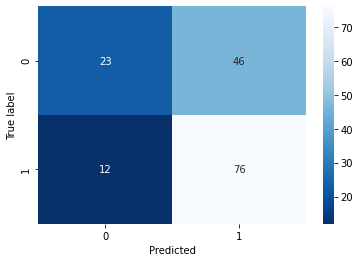

In [114]:

accuracy = accuracy_score(y_test_4 , y_pred_4)
recall = recall_score(y_test_4 , y_pred_4, pos_label=1)
precision = precision_score(y_test_4 , y_pred_4)
print('accuracy =', accuracy)
print('recall  =', recall )
print('precision =', precision)

cm = confusion_matrix(y_test_4 , y_pred_4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Тоочность модели составляет 63 %. Модель часто делает предсказания типа False Positive. При покупке коров наиболее критическая ошибка 1-го рода и наиболее важный для нас показатель precision. 

Сведем критичную ошибку к нулю,  для этого изменим порог принадлежности к классам. 

recall  = 0.09090909090909091
precision = 1.0


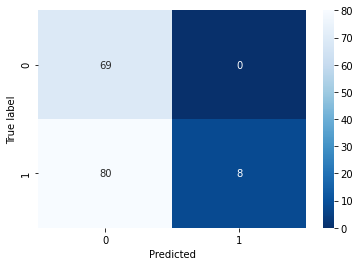

In [115]:
y_pred_4_806 = np.where(y_proba_4[:, 1] >= 0.806, 1, 0)

recall = recall_score(y_test_4 , y_pred_4_806 , pos_label=1)
precision = precision_score(y_test_4 , y_pred_4_806 )
print('recall  =', recall )
print('precision =', precision)

cm = confusion_matrix(y_test_4 , y_pred_4_806 )
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Для сведениия критической ошибки к 0, был найден порог 0.806. Метрика precision стала равна 1, а метрика recall равна 0.091

Исходя из анализа модели, она не очень хорошо описывает данные, необходимо больше дополнительной инфрмации для обучения.

<span style="font-size: 14px;"><b> Прогноз вкуса молока коров из списка для покупки </b></span> 

In [116]:
X_buy = cow_buy.drop([ 'удой'], axis=1) 
X_buy['эке'] = ferma_main['эке'].median() * 1.05
X_buy['спо'] = ferma_main['спо'].median() * 1.05
X_buy['протеин'] = ferma_main['протеин'].median() * 1.05
new_order_cow_buy = data_learn_4.columns.tolist()
new_order_cow_buy.remove('вкус')
X_buy = X_buy[new_order_cow_buy]
X_buy['спо'] = (X_buy['спо'] > 0.92).astype(int)
X_buy['эке'] = X_buy['эке'] ** 2
X_buy.info()
X_buy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   порода       20 non-null     object 
 1   порода_папы  20 non-null     object 
 2   имя_папы     20 non-null     object 
 3   возраст      20 non-null     object 
 4   эке          20 non-null     float64
 5   протеин      20 non-null     float64
 6   спо          20 non-null     int64  
 7   пастбище     20 non-null     object 
 8   жирность     20 non-null     float64
 9   белок        20 non-null     float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.7+ KB


,порода,порода_папы,имя_папы,возраст,эке,протеин,спо,пастбище,жирность,белок
0,Вис Бик Айдиал,Айдиал,Геркулес,более_2_лет,238.239225,1982.4,1,холмистое,3.58,3.076
1,Вис Бик Айдиал,Соверин,Буйный,менее_2_лет,238.239225,1982.4,1,равнинное,3.54,3.081
2,РефлешнСоверинг,Соверин,Барин,более_2_лет,238.239225,1982.4,1,равнинное,3.59,3.074
3,РефлешнСоверинг,Айдиал,Буйный,более_2_лет,238.239225,1982.4,1,холмистое,3.40,3.061
4,РефлешнСоверинг,Айдиал,Буйный,более_2_лет,238.239225,1982.4,1,равнинное,3.64,3.074


In [117]:
cat_col_names_buy = ['порода', 'порода_папы', 'имя_папы', 'возраст', 'пастбище', 'спо']
num_col_names_buy = ['эке', 'протеин', 'жирность', 'белок']

encoder = OneHotEncoder(drop='first', sparse=False)
X_buy_ohe = encoder.fit_transform(X_buy[cat_col_names_buy])
encoder_col_names_buy = encoder.get_feature_names() 

scaler = StandardScaler()
X_buy_scaled= scaler.fit_transform(X_buy[num_col_names_buy])

X_buy_ohe = pd.DataFrame(X_buy_ohe, columns=encoder_col_names_buy)
X_buy_scaled = pd.DataFrame(X_buy_scaled, columns=num_col_names_buy)

X_buy = pd.concat([X_buy_ohe, X_buy_scaled], axis=1)
X_buy .insert(7, 'x5_1', 1.0)

display(X_test_4.head())
display(X_buy.head())

,x0_РефлешнСоверинг,x1_Соверин,x2_Буйный,x2_Геркулес,x2_Соловчик,x3_менее_2_лет,x4_Холмистое,x5_1,эке,протеин,жирность,белок
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.527089,-0.813322,0.201807,0.094429
1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.490346,0.026730,0.622652,-1.065819
2,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.527089,-0.682405,0.141686,0.094429
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.961737,-1.058792,0.081565,-0.679069
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.561660,-1.413360,0.081565,0.094429


,x0_РефлешнСоверинг,x1_Соверин,x2_Буйный,x2_Геркулес,x2_Соловчик,x3_менее_2_лет,x4_холмистое,x5_1,эке,протеин,жирность,белок
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-1.0,-1.0,0.020225,0.645020
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,-1.0,-1.0,-0.303380,1.141190
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,0.101127,0.446553
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-1.0,-1.0,-1.436000,-0.843488
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,0.505634,0.446553


In [118]:
predictions_buy = clf.predict(X_buy)
s_predictions_buy = pd.Series(predictions_buy).apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')
cow_buy.insert(len(cow_buy.columns), 'вкус', s_predictions_buy)

## Итоговые выводы

<span style="font-size: 14px;"><b> Результаты работы </b></span> 

In [119]:
cow_buy.head(20)

,порода,пастбище,порода_папы,имя_папы,жирность,белок,возраст,удой,вкус
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6281,не вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6049,не вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,5955,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6264,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6213,не вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6096,не вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6281,не вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6242,не вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,5955,не вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6071,не вкусно


Согласно прогнозу, коров с удоем выше 6000 и вкусным молоком нет в списке для покупок.

Из регрессионной модели следует, что коров с удоем больше 6000 16 шт. Но исходя их довериельного интервала, не про одну корову из списка нельзя сказать , что удой точно будет выше 6000 кг. Модель имеет показатель R2 = 0.82 и хорошо описывакет данные.
Логистическая модель определения вкуса описывает данные не очень хорошо, достоверно определить вкусное молоко в тестовой выборке было возможно у минимального количества коро. 

<span style="font-size: 14px;"><b> Выводы о моделях линейной регрессии и логистической регрессии. </b></span> 

Для данной задачи качество данных улучшалось за счет: 

Очистки данных

Обработки выбросов, устранения аномалий, которые могут искажать модель.

Нормализация/стандартизация.

Создание новых признаков за счет возведения в степень и приведения к бинарному категориальному признаку для приведения к линейному виду.

Улучшить модели можно добавлением новых параметров, например подвижности, использованием более сложных алгоритмов и дополнительным исследованием данных.

Важными метриками для моделей классификации являются Accuracy, Precision, Recall, так как важно найти баланс между ложноположительными и ложноотрицательными ошибками.